In [46]:
# 导入所需要的包
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import jieba

import jieba
import matplotlib.pyplot as plt
import pandas as pd
from imageio import imread  # pip install pillow
from wordcloud import WordCloud
import warnings

warnings.filterwarnings('ignore')
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

In [47]:
# 读取数据
train = pd.read_excel('./data/data.xlsx')
test = pd.read_excel('./data/test.xlsx')
data_数据说明 = pd.read_excel('./data/字段说明.xlsx')

# 任务二：分析数据中用户评价的积极情绪、消极情绪与评价时间是否存在关系，请说明理由。

In [48]:
train

,target,userId,sellerId,timestamp,comment
0,1,127,1708,2019-10-01 00:57:45.000003,text：订餐1个半小时不见餐，催了还挂电话！☆ ☆ ☆
1,1,1661,886,2019-10-01 00:42:07.000001,text：太不靠谱！× × 不是漏发订单就是菜送错了，要不就早送一小时！！！× ×
2,0,92758,10612,2019-10-01 00:51:18.000000,text：超级超级喜欢吃，每次去都好开心，口味很好，建议手套多戴几双，吃完之后的形象是不太好...
3,0,1639,1699,2019-10-03 00:01:56.000001,text：谢谢快递哥哥，非常准时，辛苦啦
4,1,241839,36556,2019-10-01 00:07:56.000004,非常差得餐厅，上菜非常慢，且贵！属于可以在餐厅饿死的那种\n，面条没有味道，一碗28，坑死爹...
...,...,...,...,...,...
17948,0,34025,24833,2020-09-25 23:15:36.000003,"text：感觉这里好像发挥不是很稳定,来了几此,有好有坏.吃日料主要就关注三文鱼,这里的属于..."
17949,1,656,901,2020-09-25 23:17:48.999999,text：订的九点送到，十二点才到，呵呵× × × × × × × ×
17950,1,612,743,2020-09-27 23:36:59.000000,text：差评！辣白菜五花肉石锅拌饭超级难吃！五花肉又硬又难吃，感觉不新鲜。以后再也不会吃这家店了
17951,1,146739,15687,2020-09-27 23:53:15.000000,又贵又不好吃，老婆几次非要来看看，这次一吃真难吃。\n蒸没错，但比炒菜更油腻，没啥菜好吃，以...


In [49]:
train['timestamp'].apply(lambda x:str(x)[17:19])

0        45
1        07
2        18
3        56
4        56
         ..
17948    36
17949    48
17950    59
17951    15
17952    19
Name: timestamp, Length: 17953, dtype: object

In [50]:
train['year'] = train['timestamp'].apply(lambda x:str(x)[:4])
train['month'] = train['timestamp'].apply(lambda x:str(x)[5:7])
train['day'] = train['timestamp'].apply(lambda x:str(x)[8:10])
train['hour'] = train['timestamp'].apply(lambda x:str(x)[11:13])
train['muin'] = train['timestamp'].apply(lambda x:str(x)[14:16])
train['sec'] = train['timestamp'].apply(lambda x:str(x)[17:19])

In [51]:
train.groupby('target')['hour'].value_counts()

target  hour
0       20      857
        21      857
        13      737
        12      716
        11      673
        10      434
        14      400
        22      397
        19      359
        09      348
        06      327
        08      324
        18      308
        07      290
        15      249
        23      245
        16      208
        17      196
        00      188
        02      165
        01      161
        03      119
        04       84
        05       30
1       21      891
        20      860
        13      815
        12      759
        11      731
        14      481
        10      476
        22      424
        09      376
        08      370
        06      367
        19      364
        18      337
        07      266
        15      252
        23      219
        00      216
        02      216
        16      213
        17      212
        01      201
        03      110
        04       85
        05       40
Name: hour, dtype: int64

In [52]:
train.groupby('target')['hour'].value_counts().sort_index().tolist()

[188,
 161,
 165,
 119,
 84,
 30,
 327,
 290,
 324,
 348,
 434,
 673,
 716,
 737,
 400,
 249,
 208,
 196,
 308,
 359,
 857,
 857,
 397,
 245,
 216,
 201,
 216,
 110,
 85,
 40,
 367,
 266,
 370,
 376,
 476,
 731,
 759,
 815,
 481,
 252,
 213,
 212,
 337,
 364,
 860,
 891,
 424,
 219]

In [53]:
data = pd.DataFrame(columns=['hour','positive','negative'])
data['hour'] = range(1,25)
data['positive'] = train.groupby('target')['hour'].value_counts().sort_index().tolist()[:24]
data['negative'] = train.groupby('target')['hour'].value_counts().sort_index().tolist()[24:]

In [54]:
data

,hour,positive,negative
0,1,188,216
1,2,161,201
2,3,165,216
3,4,119,110
4,5,84,85
5,6,30,40
6,7,327,367
7,8,290,266
8,9,324,370
9,10,348,376


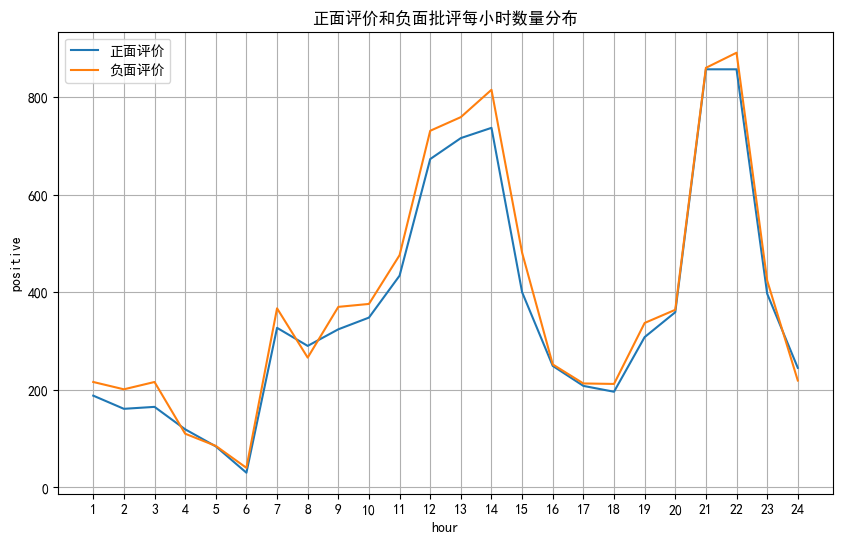

In [55]:
plt.figure(figsize=(10,6))
sns.lineplot(x='hour',y='positive',data=data,label='正面评价')
sns.lineplot(x='hour',y='negative',data=data,label='负面评价')
plt.xticks(data['hour'])
plt.title('正面评价和负面批评每小时数量分布')
plt.grid()

In [56]:
train

,target,userId,sellerId,timestamp,comment,year,month,day,hour,muin,sec
0,1,127,1708,2019-10-01 00:57:45.000003,text：订餐1个半小时不见餐，催了还挂电话！☆ ☆ ☆,2019,10,01,00,57,45
1,1,1661,886,2019-10-01 00:42:07.000001,text：太不靠谱！× × 不是漏发订单就是菜送错了，要不就早送一小时！！！× ×,2019,10,01,00,42,07
2,0,92758,10612,2019-10-01 00:51:18.000000,text：超级超级喜欢吃，每次去都好开心，口味很好，建议手套多戴几双，吃完之后的形象是不太好...,2019,10,01,00,51,18
3,0,1639,1699,2019-10-03 00:01:56.000001,text：谢谢快递哥哥，非常准时，辛苦啦,2019,10,03,00,01,56
4,1,241839,36556,2019-10-01 00:07:56.000004,非常差得餐厅，上菜非常慢，且贵！属于可以在餐厅饿死的那种\n，面条没有味道，一碗28，坑死爹...,2019,10,01,00,07,56
...,...,...,...,...,...,...,...,...,...,...,...
17948,0,34025,24833,2020-09-25 23:15:36.000003,"text：感觉这里好像发挥不是很稳定,来了几此,有好有坏.吃日料主要就关注三文鱼,这里的属于...",2020,09,25,23,15,36
17949,1,656,901,2020-09-25 23:17:48.999999,text：订的九点送到，十二点才到，呵呵× × × × × × × ×,2020,09,25,23,17,48
17950,1,612,743,2020-09-27 23:36:59.000000,text：差评！辣白菜五花肉石锅拌饭超级难吃！五花肉又硬又难吃，感觉不新鲜。以后再也不会吃这家店了,2020,09,27,23,36,59
17951,1,146739,15687,2020-09-27 23:53:15.000000,又贵又不好吃，老婆几次非要来看看，这次一吃真难吃。\n蒸没错，但比炒菜更油腻，没啥菜好吃，以...,2020,09,27,23,53,15


In [57]:
train.groupby('target')['day'].value_counts().sort_index().tolist()

[347,
 305,
 256,
 258,
 303,
 282,
 288,
 288,
 311,
 271,
 281,
 303,
 279,
 274,
 319,
 288,
 287,
 256,
 311,
 282,
 283,
 301,
 283,
 273,
 299,
 281,
 256,
 268,
 288,
 247,
 104,
 327,
 316,
 257,
 287,
 351,
 312,
 308,
 328,
 327,
 282,
 306,
 346,
 310,
 284,
 309,
 355,
 288,
 310,
 340,
 316,
 307,
 342,
 317,
 256,
 266,
 313,
 283,
 270,
 288,
 236,
 144]

In [58]:
data = pd.DataFrame(columns=['day','positive','negative'])
data['day'] = range(1,32)
data['positive'] = train.groupby('target')['day'].value_counts().sort_index().tolist()[:31]
data['negative'] = train.groupby('target')['day'].value_counts().sort_index().tolist()[31:]
data

,day,positive,negative
0,1,347,327
1,2,305,316
2,3,256,257
3,4,258,287
4,5,303,351
5,6,282,312
6,7,288,308
7,8,288,328
8,9,311,327
9,10,271,282


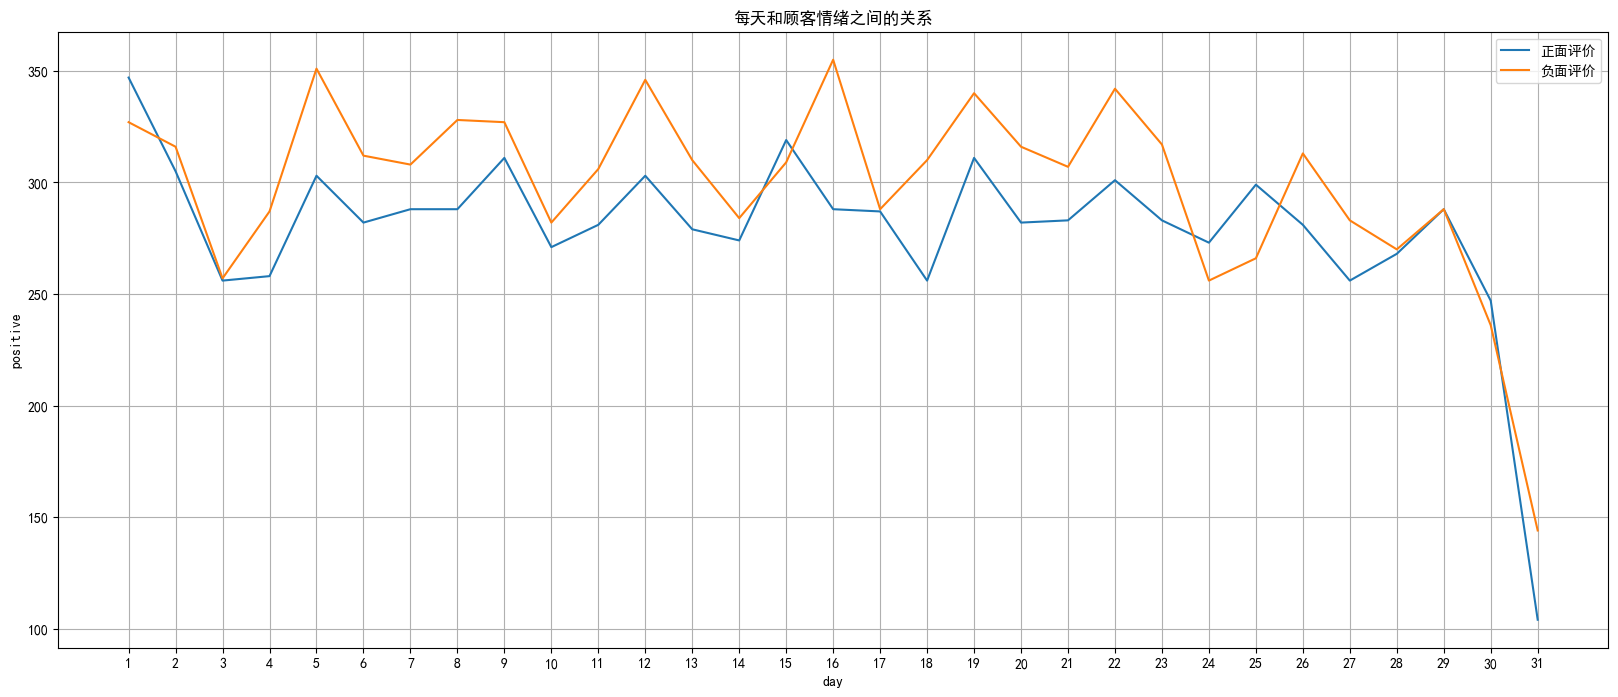

In [59]:
plt.figure(figsize=(20,8))
sns.lineplot(x='day',y='positive',data=data,label='正面评价')
sns.lineplot(x='day',y='negative',data=data,label='负面评价')
plt.xticks(data['day'])
plt.title("每天和顾客情绪之间的关系")
plt.grid()

In [60]:
train['flag'] = train['year'].astype(str)+train['month'].astype(str)
train

,target,userId,sellerId,timestamp,comment,year,month,day,hour,muin,sec,flag
0,1,127,1708,2019-10-01 00:57:45.000003,text：订餐1个半小时不见餐，催了还挂电话！☆ ☆ ☆,2019,10,01,00,57,45,201910
1,1,1661,886,2019-10-01 00:42:07.000001,text：太不靠谱！× × 不是漏发订单就是菜送错了，要不就早送一小时！！！× ×,2019,10,01,00,42,07,201910
2,0,92758,10612,2019-10-01 00:51:18.000000,text：超级超级喜欢吃，每次去都好开心，口味很好，建议手套多戴几双，吃完之后的形象是不太好...,2019,10,01,00,51,18,201910
3,0,1639,1699,2019-10-03 00:01:56.000001,text：谢谢快递哥哥，非常准时，辛苦啦,2019,10,03,00,01,56,201910
4,1,241839,36556,2019-10-01 00:07:56.000004,非常差得餐厅，上菜非常慢，且贵！属于可以在餐厅饿死的那种\n，面条没有味道，一碗28，坑死爹...,2019,10,01,00,07,56,201910
...,...,...,...,...,...,...,...,...,...,...,...,...
17948,0,34025,24833,2020-09-25 23:15:36.000003,"text：感觉这里好像发挥不是很稳定,来了几此,有好有坏.吃日料主要就关注三文鱼,这里的属于...",2020,09,25,23,15,36,202009
17949,1,656,901,2020-09-25 23:17:48.999999,text：订的九点送到，十二点才到，呵呵× × × × × × × ×,2020,09,25,23,17,48,202009
17950,1,612,743,2020-09-27 23:36:59.000000,text：差评！辣白菜五花肉石锅拌饭超级难吃！五花肉又硬又难吃，感觉不新鲜。以后再也不会吃这家店了,2020,09,27,23,36,59,202009
17951,1,146739,15687,2020-09-27 23:53:15.000000,又贵又不好吃，老婆几次非要来看看，这次一吃真难吃。\n蒸没错，但比炒菜更油腻，没啥菜好吃，以...,2020,09,27,23,53,15,202009


In [61]:
min = len(train.groupby('target')['flag'].value_counts().sort_index().tolist())/2
min = int(min)

In [62]:
data = pd.DataFrame(columns=['flag','positive','negative'])
data['flag'] = range(1,min+1)
data['positive'] = train.groupby('target')['flag'].value_counts().sort_index().tolist()[:min]
data['negative'] = train.groupby('target')['flag'].value_counts().sort_index().tolist()[min:]
data

,flag,positive,negative
0,1,668,787
1,2,738,749
2,3,690,778
3,4,738,849
4,5,743,732
5,6,744,812
6,7,694,825
7,8,799,837
8,9,735,721
9,10,743,768


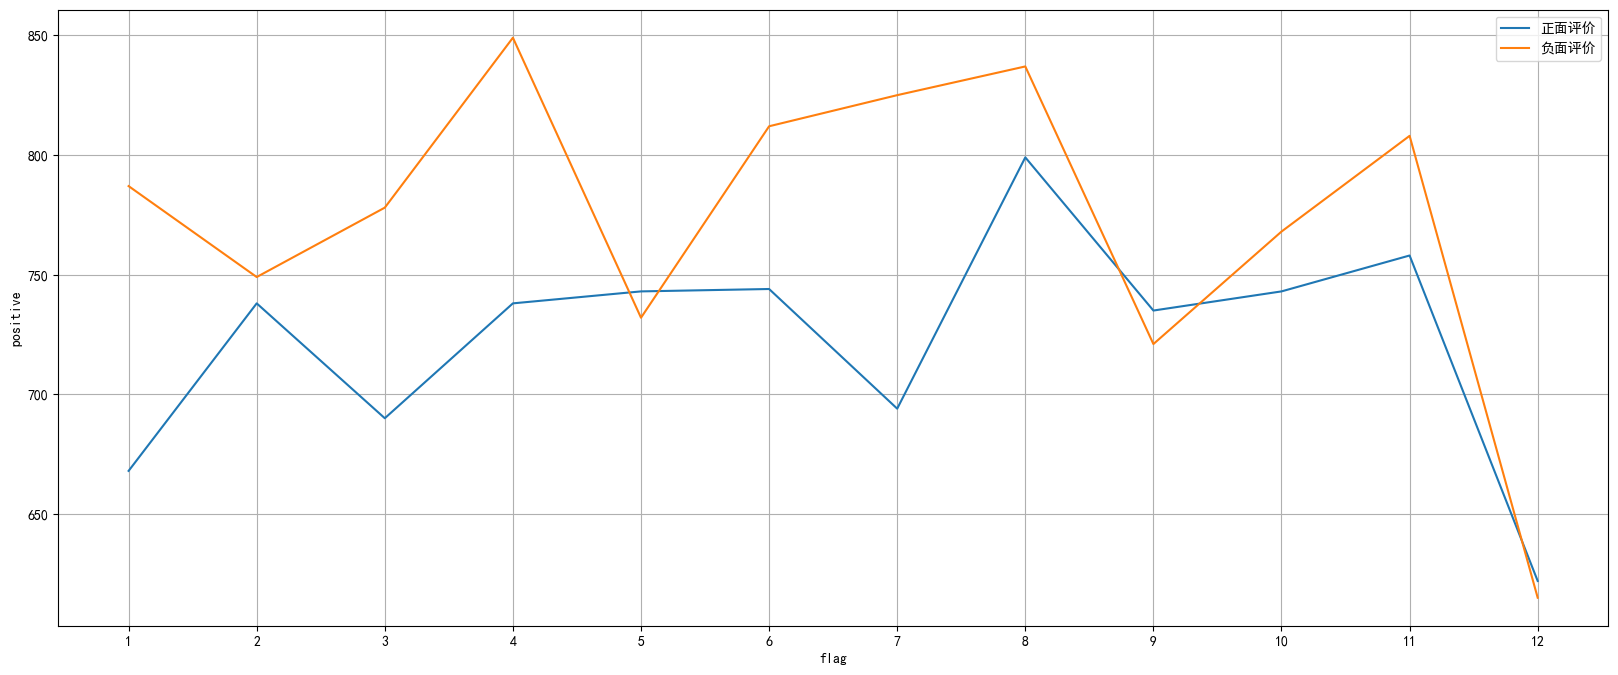

In [63]:
plt.figure(figsize=(20,8))
sns.lineplot(x='flag',y='positive',data=data,label='正面评价')
sns.lineplot(x='flag',y='negative',data=data,label='负面评价')
plt.xticks(data['flag'])
plt.grid()

In [64]:
train['target'].value_counts()

1    9281
0    8672
Name: target, dtype: int64

In [65]:
train['year'].astype(str)+'-'+train['month'].astype(str)+'-'+train['day'].astype(str)

0        2019-10-01
1        2019-10-01
2        2019-10-01
3        2019-10-03
4        2019-10-01
            ...    
17948    2020-09-25
17949    2020-09-25
17950    2020-09-27
17951    2020-09-27
17952    2020-09-27
Length: 17953, dtype: object

In [66]:
train['weekday'] = pd.to_datetime(train['year'].astype(str)+'-'+train['month'].astype(str)+'-'+train['day'].astype(str)).dt.weekday

In [67]:
data = pd.DataFrame(columns=['weekday','positive','negative'])
data['weekday'] = range(1,8)
data['positive'] = train.groupby('target')['weekday'].value_counts().sort_index().tolist()[:7]
data['negative'] = train.groupby('target')['weekday'].value_counts().sort_index().tolist()[7:]
# data

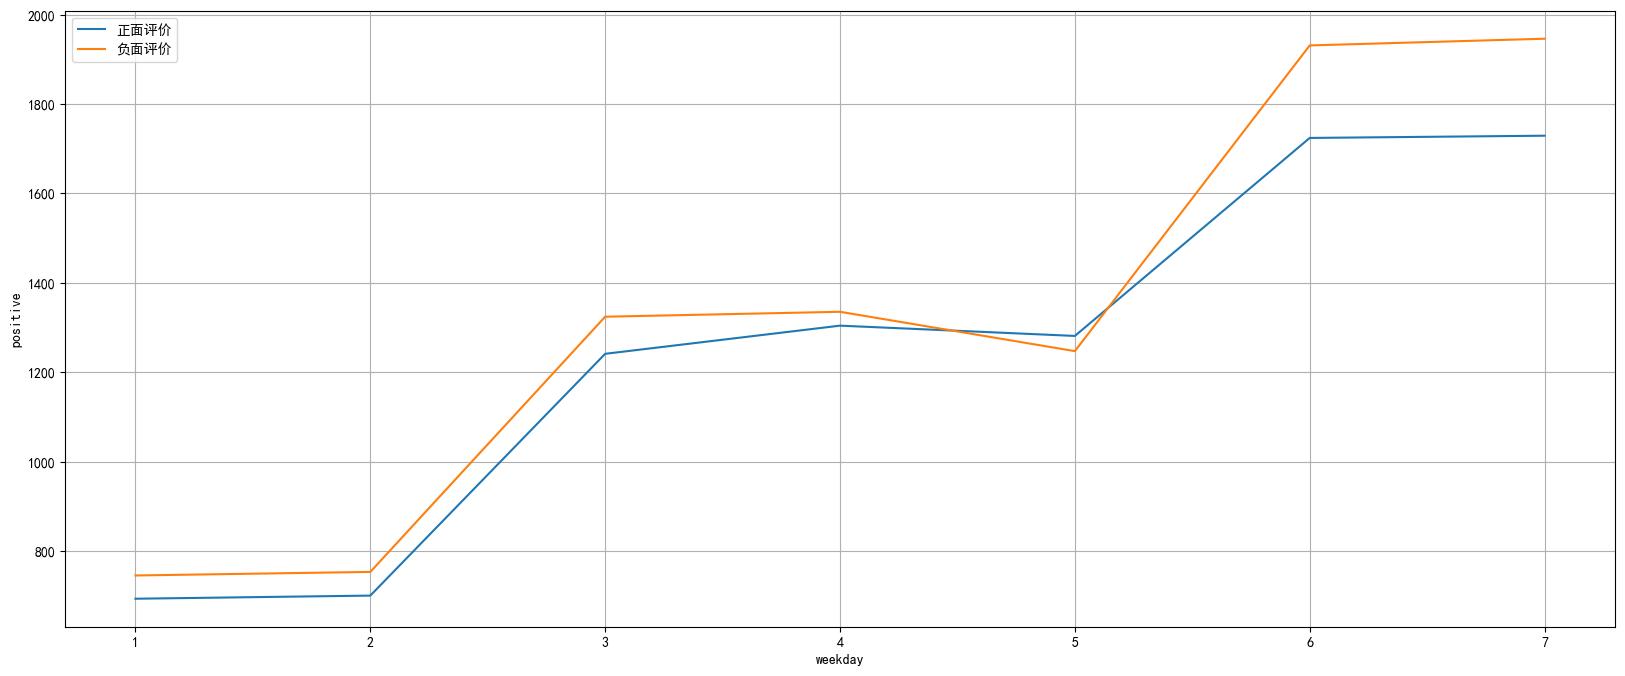

In [68]:
plt.figure(figsize=(20,8))
sns.lineplot(x='weekday',y='positive',data=data,label='正面评价')
sns.lineplot(x='weekday',y='negative',data=data,label='负面评价')
plt.xticks(data['weekday'])
plt.grid()

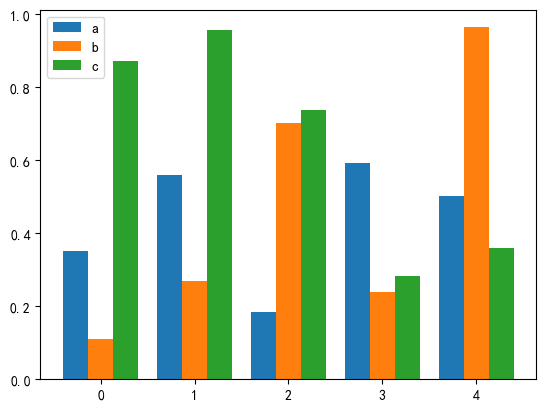

In [69]:
import numpy as np

import matplotlib.pyplot as plt

size = 5

x = np.arange(size)

a = np.random.random(size)

b = np.random.random(size)

c = np.random.random(size)

total_width, n = 0.8, 3

width = total_width / n

x = x - (total_width - width) / 2

plt.bar(x, a, width=width, label='a')

plt.bar(x + width, b, width=width, label='b')

plt.bar(x + 2 * width, c, width=width, label='c')

plt.legend()

plt.show()

In [70]:
data

,weekday,positive,negative
0,1,693,745
1,2,700,753
2,3,1241,1324
3,4,1304,1335
4,5,1281,1247
5,6,1724,1931
6,7,1729,1946


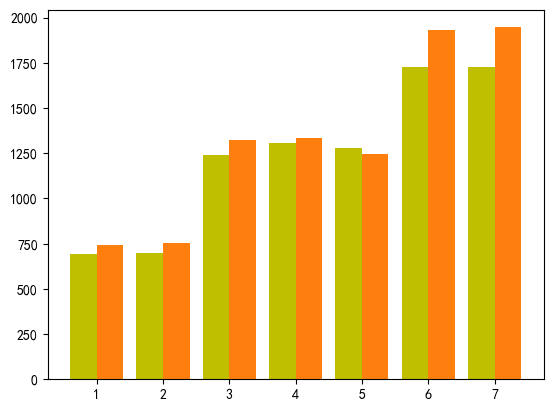

In [71]:
total_width, n = 0.8, 2
width = total_width / n

plt.bar(data['weekday']-width/2, data['positive'],width=width,label='boy',fc = 'y')
plt.bar(data['weekday']+width/2, data['negative'],width=width, label='negative')
plt.show()

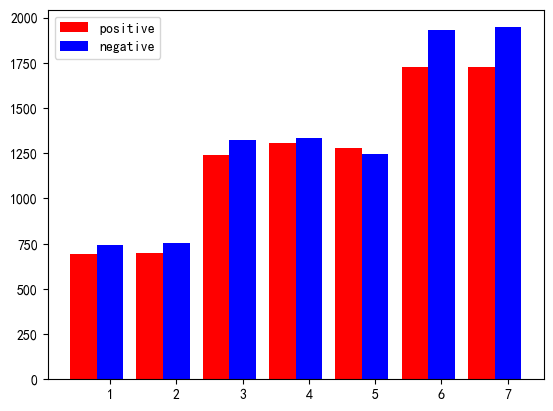

In [77]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
total_width, n = 0.8, 2
width = total_width / n
name_list = data['weekday'].tolist()
num_list = data['positive'].tolist()
num_list1 = data['negative'].tolist()
x =list(range(len(num_list)))
total_width, n = 0.8, 2
width = total_width / n
 
plt.bar(x, num_list, width=width, label='positive',fc = 'r')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, num_list1, width=width, label='negative',tick_label = name_list,fc = 'b')
plt.legend()
plt.show()

In [82]:
[round(y/(x+y),3) for x, y in zip(data['positive'].tolist(),data['negative'].tolist())]

[0.518, 0.518, 0.516, 0.506, 0.493, 0.528, 0.53]

In [73]:
import matplotlib.pyplot as plt
import numpy as np


# # 构造数据
# menMeans = (20, 35, 30, 35, 27)
# womenMeans = (25, 32, 34, 20, 25)
# xlabels = ['G1', 'G2', 'G3', 'G4', 'G5']
# width = 0.35

# plt.subplot(211)
# p1 = plt.bar(data['weekday'], data['positive'], width, label='Men')
# plt.bar_label(p1, label_type='center')
# plt.title('center')
# plt.subplot(212)
# p2 = plt.bar(data['weekday'], data['negative'], width, label='Women')
# plt.bar_label(p2, label_type='edge')
# plt.title('edge')
# plt.show()


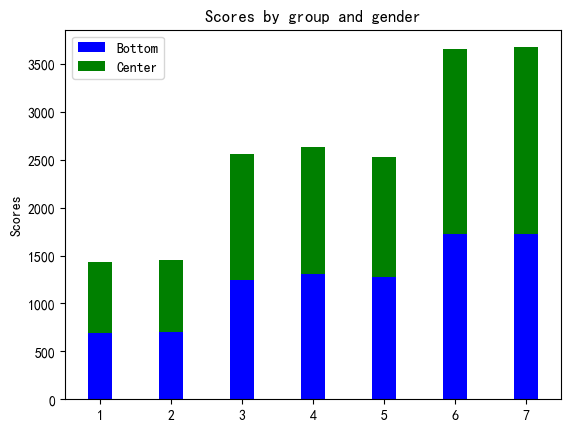

In [74]:
plt.title('Scores by group and gender')

N = 7
ind = np.arange(N)  #[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
plt.xticks(ind, data['weekday'])
plt.ylabel('Scores')
Bottom = data['positive']
Center = data['negative']

d = []
for i in range(0, len(Bottom)):
    sum = Bottom[i] + Center[i]
    d.append(sum)
width = 0.35  # 设置条形图一个长条的宽度
p1 = plt.bar(ind, Bottom, width, color='blue') 
p2 = plt.bar(ind, Center, width, bottom=Bottom,color='green')  

plt.legend((p1[0], p2[0]), ('Bottom', 'Center'),loc = 2)

plt.show()

In [75]:
data

,weekday,positive,negative
0,1,693,745
1,2,700,753
2,3,1241,1324
3,4,1304,1335
4,5,1281,1247
5,6,1724,1931
6,7,1729,1946


[[0.89888504 0.30549789 0.20676663 1.        ]
 [0.24805844 0.66720492 0.3502499  1.        ]]


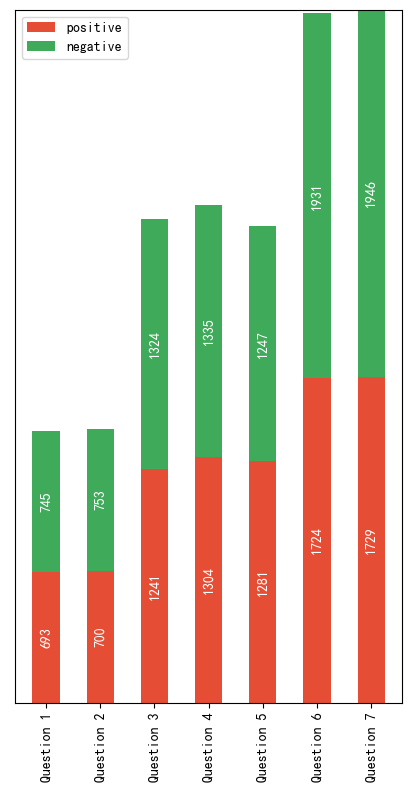

In [76]:
import numpy as np
import matplotlib.pyplot as plt


category_names = ['positive','negative']
results = {
    'Question 1': [693, 745],
    'Question 2': [700, 753],
    'Question 3': [1241, 1324],
    'Question 4': [1304, 1335],
    'Question 5': [1281, 1247],
    'Question 6': [1724, 1931],
    'Question 7': [1729, 1946]
}


def survey(results, category_names):
    labels = list(results.keys())
    # 获取标签
    data = np.array(list(results.values()))
    # 获取具体数值
    data_cum = data.cumsum(axis=1)
    # 逐项加和
    category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, data.shape[1]))

    """
    在cmmap中取出五组颜色
    category_colors:
        [[0.89888504 0.30549789 0.20676663 1.        ]
         [0.99315648 0.73233372 0.42237601 1.        ]
         [0.99707805 0.9987697  0.74502115 1.        ]
         [0.70196078 0.87297193 0.44867359 1.        ]
         [0.24805844 0.66720492 0.3502499  1.        ]]
    
    """

    print(category_colors)
    # 常见颜色序列， 在cmap中取色

    fig, ax = plt.subplots(figsize=(5, 9))
    # 绘图
    # ax.invert_xaxis()
    # 使其更符合视觉习惯，index本身从下到上
    ax.yaxis.set_visible(False)
    ax.set_xticklabels(labels=labels, rotation=90)
    # 不需要可见
    ax.set_ylim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        heights = data[:, i]
        # 取第一列数值
        starts = data_cum[:, i] - heights
        # 取每段的起始点
        ax.bar(labels, heights, bottom=starts, width=0.5,
                label=colname, color=color)
        xcenters = starts + heights / 2
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, heights)):
            ax.text(y, x, str(int(c)), ha='center', va='center',
                    color=text_color, rotation = 90)
    ax.legend()
    return fig, ax


survey(results, category_names)
plt.show()

